# Application: Tourism Recommendation System

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1.  Import datasets

In [2]:
#load user movement datasets
hiroshima_challengedata = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\hiroshima_challengedata.csv")
kumamoto_challengedata = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\Project2\\kumamoto_challengedata.csv")
sapporo_challengedata = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\Project2\\sapporo_challengedata.csv")
task1_dataset_kotae=pd.read_csv("C:\\Users\\Nancy\\OneDrive\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\task1_dataset_kotae.csv")
POI_datacategories = pd.read_csv("C:\\Users\\Nancy\\OneDrive\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\POI_datacategories.csv")
POIdata_cityA= pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\POIdata_cityA.csv")
POIdata_cityB= pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\POIdata_cityB.csv")
POIdata_cityC = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\POIdata_cityC.csv")
POIdata_cityD = pd.read_csv("C:\\Users\\Nancy\\OneDrive\\Documents\\NTU\\year3 sem1\\SC4020\\Project2\\POIdata_cityD.csv")


In [3]:
# Using the below function for memory optimization so that space can be utilized in better way
# Taken from https://www.kaggle.com/rinnqd/reduce-memory-usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [4]:

# Applying the above function to each dataframe
hiroshima_challengedata = reduce_mem_usage(hiroshima_challengedata)
kumamoto_challengedata = reduce_mem_usage(kumamoto_challengedata)
sapporo_challengedata = reduce_mem_usage(sapporo_challengedata)
task1_dataset_kotae= reduce_mem_usage(task1_dataset_kotae)
POI_datacategories = reduce_mem_usage(POI_datacategories)
POIdata_cityA = reduce_mem_usage(POIdata_cityA)
POIdata_cityB = reduce_mem_usage(POIdata_cityB)
POIdata_cityC = reduce_mem_usage(POIdata_cityC)
POIdata_cityD = reduce_mem_usage(POIdata_cityD)

#test = test_df
#sample_submission
#train = train_df
#merchants = merchants_df
#new_merchant_transactions = new_trans_df
#historical_transactions = hist_trans_df
#Data_Dictionary = history_info

Memory usage after optimization is: 185.97 MB
Decreased by 80.0%
Memory usage after optimization is: 64.23 MB
Decreased by 80.0%
Memory usage after optimization is: 140.81 MB
Decreased by 80.0%
Memory usage after optimization is: 1063.68 MB
Decreased by 75.0%
Memory usage after optimization is: 0.00 MB
Decreased by 0.0%
Memory usage after optimization is: 1.48 MB
Decreased by 78.1%
Memory usage after optimization is: 0.38 MB
Decreased by 78.1%
Memory usage after optimization is: 0.26 MB
Decreased by 78.1%
Memory usage after optimization is: 0.49 MB
Decreased by 78.1%


In [5]:
print(f"hiroshima_challengedata shape = {hiroshima_challengedata.shape}")
print(f"kumamoto_challengedata shape = {kumamoto_challengedata.shape}")
print(f"sapporo_challengedata shape = {sapporo_challengedata.shape}")
print(f"task1_dataset_kotae shape = {task1_dataset_kotae.shape}")
print(f"POI_datacategories shape = {POI_datacategories.shape}")
print(f"POIdata_cityA shape = {POIdata_cityA.shape}")
print(f"POIdata_cityB shape = {POIdata_cityB.shape}")
print(f"POIdata_cityC shape = {POIdata_cityC.shape}")
print(f"POIdata_cityD shape = {POIdata_cityD.shape}")


hiroshima_challengedata shape = (24375898, 5)
kumamoto_challengedata shape = (8418135, 5)
sapporo_challengedata shape = (18456528, 5)
task1_dataset_kotae shape = (111535175, 5)
POI_datacategories shape = (84, 1)
POIdata_cityA shape = (221248, 4)
POIdata_cityB shape = (56181, 4)
POIdata_cityC shape = (39064, 4)
POIdata_cityD shape = (72794, 4)


In [6]:
hiroshima_challengedata.head(10)

,uid,d,t,x,y
0,0,0,20,80,99
1,0,0,21,81,97
2,0,0,25,83,102
3,0,0,26,80,101
4,0,0,27,80,101
5,0,0,33,80,101
6,0,0,34,80,101
7,0,0,37,80,101
8,0,0,38,80,102
9,0,0,39,79,96


In [7]:
kumamoto_challengedata.head(10)

,uid,d,t,x,y
0,0,0,13,133,103
1,0,0,14,143,98
2,0,0,16,162,99
3,0,0,17,149,97
4,0,0,18,144,98
5,0,0,20,160,100
6,0,0,21,155,99
7,0,0,22,143,98
8,0,0,23,163,94
9,0,0,24,146,97


In [8]:
sapporo_challengedata.head(10)

,uid,d,t,x,y
0,0,5,15,28,157
1,0,5,16,28,158
2,0,5,17,28,157
3,0,5,18,29,158
4,0,5,19,27,157
5,0,5,20,25,155
6,0,5,21,26,153
7,0,5,22,24,156
8,0,5,23,25,154
9,0,5,24,26,155


In [9]:
task1_dataset_kotae.head(10)

,uid,d,t,x,y
0,0,0,1,79,86
1,0,0,2,79,86
2,0,0,8,77,86
3,0,0,9,77,86
4,0,0,19,81,89
5,0,0,20,82,88
6,0,0,21,81,89
7,0,0,22,81,89
8,0,0,24,76,86
9,0,0,25,75,82


In [10]:
POI_datacategories.head(10)

,Food
0,Shopping
1,Entertainment
2,Japanese restaurant
3,Western restaurant
4,Eat all you can restaurant
5,Chinese restaurant
6,Indian restaurant
7,Ramen restaurant
8,Curry restaurant
9,BBQ restaurant


In [11]:
POIdata_cityA.head(10)

,x,y,category,POI_count
0,1,1,74,4
1,1,1,48,4
2,1,1,79,2
3,1,1,69,2
4,1,1,73,1
5,1,1,59,1
6,1,1,58,1
7,1,2,61,2
8,1,2,80,1
9,1,2,48,1


In [12]:
POIdata_cityB.head(10)

,x,y,category,POI_count
0,1,1,79,2
1,1,1,84,1
2,1,2,82,1
3,1,3,54,1
4,1,3,74,1
5,1,6,58,1
6,1,6,74,1
7,1,7,61,2
8,1,7,73,1
9,1,7,56,1


In [13]:
POIdata_cityC.head(10)

,x,y,category,POI_count
0,1,35,48,1
1,1,38,48,1
2,1,45,48,1
3,1,45,47,1
4,1,108,46,1
5,1,128,74,1
6,1,128,45,1
7,1,133,65,1
8,1,134,65,1
9,1,139,81,1


In [14]:
POIdata_cityD.head(10)

,x,y,category,POI_count
0,1,11,46,1
1,1,55,60,2
2,1,55,48,1
3,1,56,68,1
4,1,56,75,1
5,1,56,41,1
6,1,56,14,1
7,1,56,82,1
8,1,56,3,1
9,1,57,69,3


In [15]:
POI_datacategories.info

<bound method DataFrame.info of                           Food
0                     Shopping
1                Entertainment
2          Japanese restaurant
3           Western restaurant
4   Eat all you can restaurant
..                         ...
79              Heavy Industry
80                         NPO
81              Utility Copany
82                        Port
83           Research Facility

[84 rows x 1 columns]>

In [16]:
hiroshima_challengedata.info

<bound method DataFrame.info of             uid   d   t    x    y
0             0   0  20   80   99
1             0   0  21   81   97
2             0   0  25   83  102
3             0   0  26   80  101
4             0   0  27   80  101
...         ...  ..  ..  ...  ...
24375893  24999  74  36  999  999
24375894  24999  74  37  999  999
24375895  24999  74  39  999  999
24375896  24999  74  43  999  999
24375897  24999  74  47  999  999

[24375898 rows x 5 columns]>

In [17]:
kumamoto_challengedata.info

<bound method DataFrame.info of           uid   d   t    x    y
0           0   0  13  133  103
1           0   0  14  143   98
2           0   0  16  162   99
3           0   0  17  149   97
4           0   0  18  144   98
...       ...  ..  ..  ...  ...
8418130  5999  74  37  999  999
8418131  5999  74  38  999  999
8418132  5999  74  39  999  999
8418133  5999  74  46  999  999
8418134  5999  74  47  999  999

[8418135 rows x 5 columns]>

In [18]:
sapporo_challengedata.info

<bound method DataFrame.info of             uid   d   t    x    y
0             0   5  15   28  157
1             0   5  16   28  158
2             0   5  17   28  157
3             0   5  18   29  158
4             0   5  19   27  157
...         ...  ..  ..  ...  ...
18456523  19999  74  31  999  999
18456524  19999  74  32  999  999
18456525  19999  74  33  999  999
18456526  19999  74  34  999  999
18456527  19999  74  35  999  999

[18456528 rows x 5 columns]>

In [19]:
task1_dataset_kotae.info

<bound method DataFrame.info of              uid   d   t    x    y
0              0   0   1   79   86
1              0   0   2   79   86
2              0   0   8   77   86
3              0   0   9   77   86
4              0   0  19   81   89
...          ...  ..  ..  ...  ...
111535170  99999  74  38  119   77
111535171  99999  74  39  132   94
111535172  99999  74  40  124  105
111535173  99999  74  41  121  107
111535174  99999  74  42  120  108

[111535175 rows x 5 columns]>

In [20]:
POIdata_cityA.info

<bound method DataFrame.info of           x    y  category  POI_count
0         1    1        74          4
1         1    1        48          4
2         1    1        79          2
3         1    1        69          2
4         1    1        73          1
...     ...  ...       ...        ...
221243  200  200        18          1
221244  200  200        53          1
221245  200  200        66          1
221246  200  200        40          1
221247  200  200        48          1

[221248 rows x 4 columns]>

In [21]:
POIdata_cityB.info

<bound method DataFrame.info of          x    y  category  POI_count
0        1    1        79          2
1        1    1        84          1
2        1    2        82          1
3        1    3        54          1
4        1    3        74          1
...    ...  ...       ...        ...
56176  200  144        33          1
56177  200  144        56          1
56178  200  150        74          1
56179  200  195        74          1
56180  200  198        48          1

[56181 rows x 4 columns]>

In [22]:
POIdata_cityC.info

<bound method DataFrame.info of          x    y  category  POI_count
0        1   35        48          1
1        1   38        48          1
2        1   45        48          1
3        1   45        47          1
4        1  108        46          1
...    ...  ...       ...        ...
39059  187  200        81          1
39060  187  200        48          1
39061  188  199        63          1
39062  188  200        73          1
39063  189  200        75          1

[39064 rows x 4 columns]>

In [23]:
POIdata_cityD.info

<bound method DataFrame.info of          x    y  category  POI_count
0        1   11        46          1
1        1   55        60          2
2        1   55        48          1
3        1   56        68          1
4        1   56        75          1
...    ...  ...       ...        ...
72789  200  192        39          1
72790  200  193        73          1
72791  200  193        75          1
72792  200  193        38          1
72793  200  193        76          1

[72794 rows x 4 columns]>

# 2. Data Cleaning

In [24]:
#checking NULL values
print(hiroshima_challengedata.isnull().sum())
print(kumamoto_challengedata.isnull().sum())
print(sapporo_challengedata.isnull().sum())
print(task1_dataset_kotae.isnull().sum())
print(POIdata_cityA.isnull().sum())
print(POIdata_cityB.isnull().sum())
print(POIdata_cityC.isnull().sum())
print(POIdata_cityD.isnull().sum())
print(POI_datacategories.isnull().sum())

uid    0
d      0
t      0
x      0
y      0
dtype: int64
uid    0
d      0
t      0
x      0
y      0
dtype: int64
uid    0
d      0
t      0
x      0
y      0
dtype: int64
uid    0
d      0
t      0
x      0
y      0
dtype: int64
x            0
y            0
category     0
POI_count    0
dtype: int64
x            0
y            0
category     0
POI_count    0
dtype: int64
x            0
y            0
category     0
POI_count    0
dtype: int64
x            0
y            0
category     0
POI_count    0
dtype: int64
Food    0
dtype: int64


Null Value Check:
No missing values were found in any of the datasets

In [25]:
#Check for duplicate rows in all datasets
print(hiroshima_challengedata.duplicated().sum())
print(kumamoto_challengedata.duplicated().sum())
print(sapporo_challengedata.duplicated().sum())
print(task1_dataset_kotae.duplicated().sum())
print(POIdata_cityA.duplicated().sum())
print(POIdata_cityB.duplicated().sum())
print(POIdata_cityC.duplicated().sum())
print(POIdata_cityD.duplicated().sum())


0
0
0
0
0
0
0
0


In [26]:
print(hiroshima_challengedata[['x', 'y']].describe())
print(kumamoto_challengedata[['x', 'y']].describe())
print(sapporo_challengedata[['x', 'y']].describe())
print(task1_dataset_kotae[['x', 'y']].describe())

                  x             y
count  2.437590e+07  2.437590e+07
mean   9.659301e+01  1.205296e+02
std    1.297042e+02  1.285458e+02
min    1.000000e+00  1.000000e+00
25%    6.800000e+01  8.400000e+01
50%    7.800000e+01  9.800000e+01
75%    9.000000e+01  1.260000e+02
max    9.990000e+02  9.990000e+02
                  x             y
count  8.418135e+06  8.418135e+06
mean   2.062765e+02  1.738753e+02
std    2.648537e+02  2.746774e+02
min    1.000000e+00  1.000000e+00
25%    9.600000e+01  5.500000e+01
50%    1.190000e+02  9.700000e+01
75%    1.810000e+02  1.170000e+02
max    9.990000e+02  9.990000e+02
                  x             y
count  1.845653e+07  1.845653e+07
mean   5.233526e+01  1.726793e+02
std    1.502066e+02  1.333039e+02
min    1.000000e+00  1.000000e+00
25%    2.100000e+01  1.460000e+02
50%    2.700000e+01  1.550000e+02
75%    3.600000e+01  1.690000e+02
max    9.990000e+02  9.990000e+02
                  x             y
count  1.115352e+08  1.115352e+08
mean   1.22907

# 3.Data Mining and Feature Engineering

In [27]:
# Convert time data to datetime format (assuming 't' is the time column in minutes)
for dataset in [hiroshima_challengedata, kumamoto_challengedata, sapporo_challengedata, task1_dataset_kotae]:
    dataset['datetime'] = pd.to_datetime(dataset['d'], unit='D', origin='unix') + pd.to_timedelta(dataset['t'], unit='m')

# Verify the conversion
print(hiroshima_challengedata[['d', 't', 'datetime']].head())


   d   t            datetime
0  0  20 1970-01-01 00:20:00
1  0  21 1970-01-01 00:21:00
2  0  25 1970-01-01 00:25:00
3  0  26 1970-01-01 00:26:00
4  0  27 1970-01-01 00:27:00


In [28]:
# Normalize spatial coordinates to 500-meter grid cells
for dataset in [hiroshima_challengedata, kumamoto_challengedata, sapporo_challengedata, task1_dataset_kotae]:
    dataset['x_normalized'] = dataset['x'] // 500
    dataset['y_normalized'] = dataset['y'] // 500

# Verify normalization
print(hiroshima_challengedata[['x', 'y', 'x_normalized', 'y_normalized']].head())


    x    y  x_normalized  y_normalized
0  80   99             0             0
1  81   97             0             0
2  83  102             0             0
3  80  101             0             0
4  80  101             0             0


In [29]:
# Replace -999 with NaN for datasets A, B, C, and D
for dataset in [POIdata_cityB, POIdata_cityC, POIdata_cityD]:
    dataset['x'] = dataset['x'].replace(-999, np.nan)
    dataset['y'] = dataset['y'].replace(-999, np.nan)

# Identify missing data for the last 15 days
for dataset_name, dataset in zip(['CityA','CityB', 'CityC', 'CityD'], [POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD]):
    missing_days = dataset[dataset['x'].isna() | dataset['y'].isna()]
    print(f"Missing data in {dataset_name}: {missing_days}")

# Optional: Fill missing values (example with forward fill)
for dataset in [POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD]:
    dataset['x'].fillna(method='ffill', inplace=True)
    dataset['y'].fillna(method='ffill', inplace=True)


Missing data in CityA: Empty DataFrame
Columns: [x, y, category, POI_count]
Index: []
Missing data in CityB: Empty DataFrame
Columns: [x, y, category, POI_count]
Index: []
Missing data in CityC: Empty DataFrame
Columns: [x, y, category, POI_count]
Index: []
Missing data in CityD: Empty DataFrame
Columns: [x, y, category, POI_count]
Index: []


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# List of all datasets to process
datasets = {
    'hiroshima': hiroshima_challengedata,
    'kumamoto': kumamoto_challengedata,
    'sapporo': sapporo_challengedata,
    'task1': task1_dataset_kotae,
    'cityA': POIdata_cityA,
    'cityB': POIdata_cityB,
    'cityC': POIdata_cityC,
    'cityD': POIdata_cityD
}

# Scaling the spatial coordinates for all datasets
scaler = StandardScaler()
for name, dataset in datasets.items():
    if 'x' in dataset.columns and 'y' in dataset.columns:
        dataset[['x', 'y']] = scaler.fit_transform(dataset[['x', 'y']])


In [31]:
# One-hot encoding for categorical features if applicable
if 'category' in dataset.columns:
        dataset = pd.get_dummies(dataset, columns=['category'])

# 4. Exploratory Data Analysis (EDA)

In [32]:
# 1. Sort activities (POI categories) by count for each city
for dataset, name in zip([POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD], ['CityA', 'CityB', 'CityC', 'CityD']):
    # Get the category counts sorted in descending order
    category_counts_sorted = dataset['category'].value_counts().sort_values(ascending=False)
    
    # Display the sorted category counts
    print(f"Most Explored Activities in {name}:")
    print(category_counts_sorted)
    print("\n")


Most Explored Activities in CityA:
81    11263
60     9232
79     9132
74     8633
48     8199
      ...  
25       17
30        3
29        2
28        1
24        1
Name: category, Length: 85, dtype: int64


Most Explored Activities in CityB:
74    3422
48    3282
81    2773
79    2472
60    2462
      ... 
2       15
25       5
28       4
29       1
30       1
Name: category, Length: 84, dtype: int64


Most Explored Activities in CityC:
48    1858
47    1569
79    1537
60    1414
81    1388
      ... 
16      11
29       3
30       2
28       2
24       1
Name: category, Length: 85, dtype: int64


Most Explored Activities in CityD:
74    3966
81    3673
60    3641
79    3545
48    3385
      ... 
2        7
28       2
30       2
25       2
24       1
Name: category, Length: 84, dtype: int64




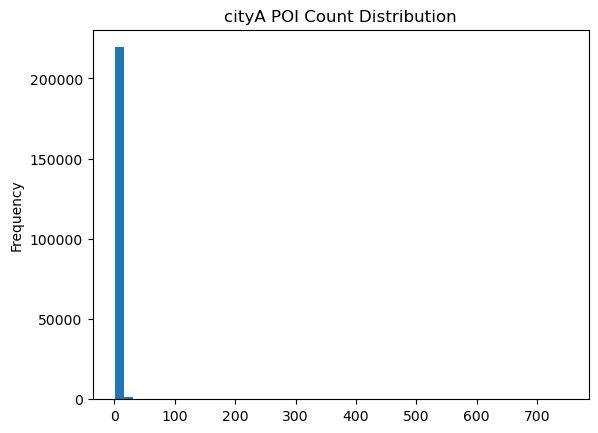

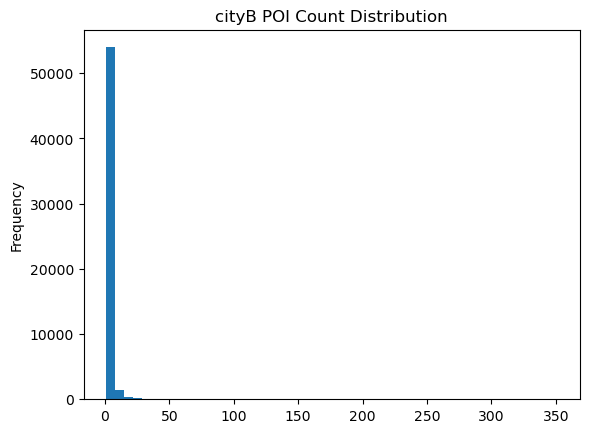

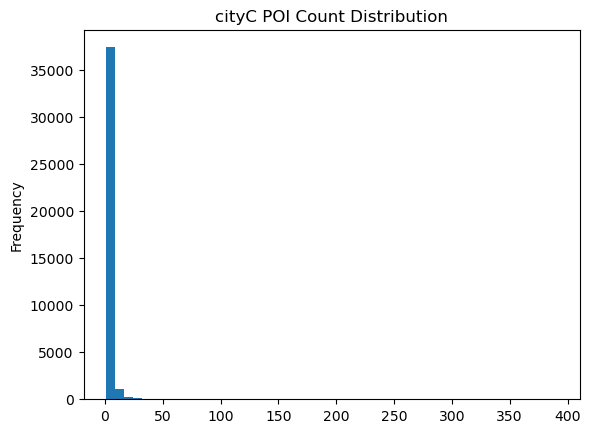

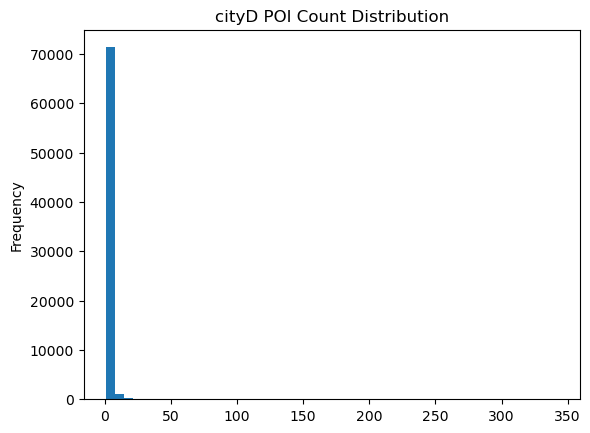

In [33]:
# Feature Engineering and Visualizations
for name, dataset in datasets.items():
    if 'POI_count' in dataset.columns:
        # Visualize POI counts distribution
        dataset['POI_count'].plot(kind='hist', bins=50, title=f'{name} POI Count Distribution')
        plt.show()

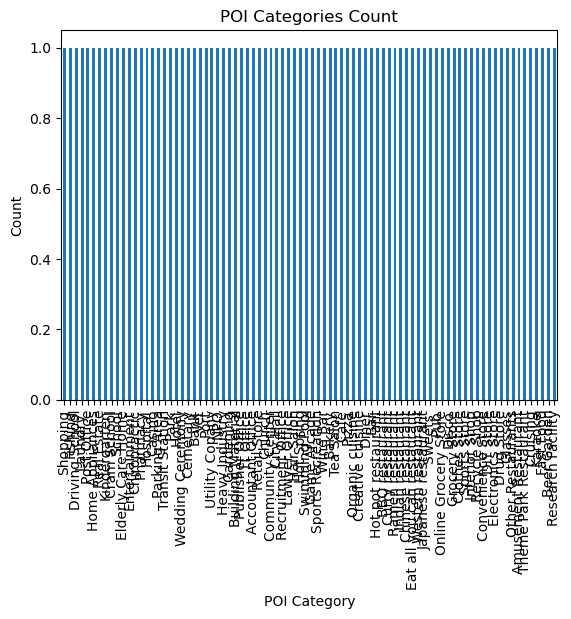

In [34]:
import matplotlib.pyplot as plt

# Plot the value counts of 'POI_datacategories'
POI_datacategories['Food'].value_counts().plot(kind='bar')
plt.title('POI Categories Count')
plt.xlabel('POI Category')
plt.ylabel('Count')
plt.show()



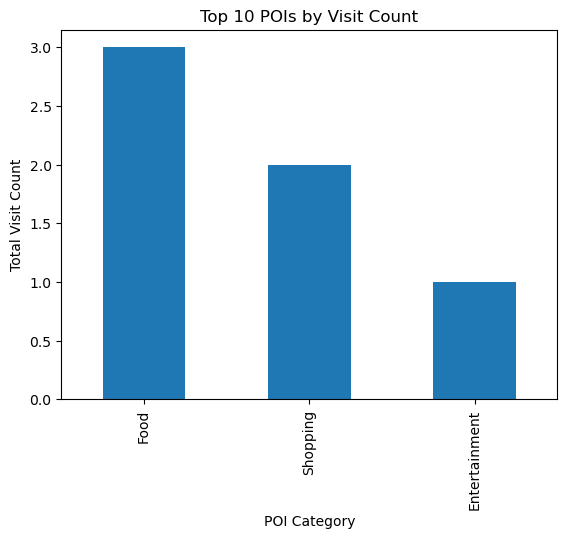

In [35]:

POIdata_cityA = pd.DataFrame({
    'x': [1, 1, 1, 1, 1],
    'y': [79, 84, 82, 54, 74],
    'category': ['Food', 'Shopping', 'Entertainment', 'Food', 'Shopping'],
    'POI_count': [2, 1, 1, 1, 1]
})

# Sum the visit count for each POI category
top_pois = POIdata_cityA.groupby('category')['POI_count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 POIs by visit count
top_pois.plot(kind='bar')
plt.title('Top 10 POIs by Visit Count')
plt.xlabel('POI Category')
plt.ylabel('Total Visit Count')
plt.show()


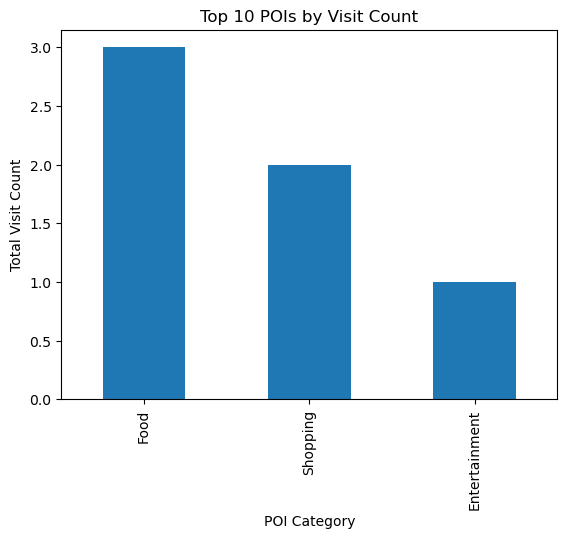

In [36]:

POIdata_cityB = pd.DataFrame({
    'x': [1, 1, 1, 1, 1],
    'y': [79, 84, 82, 54, 74],
    'category': ['Food', 'Shopping', 'Entertainment', 'Food', 'Shopping'],
    'POI_count': [2, 1, 1, 1, 1]
})

# Sum the visit count for each POI category
top_pois = POIdata_cityB.groupby('category')['POI_count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 POIs by visit count
top_pois.plot(kind='bar')
plt.title('Top 10 POIs by Visit Count')
plt.xlabel('POI Category')
plt.ylabel('Total Visit Count')
plt.show()


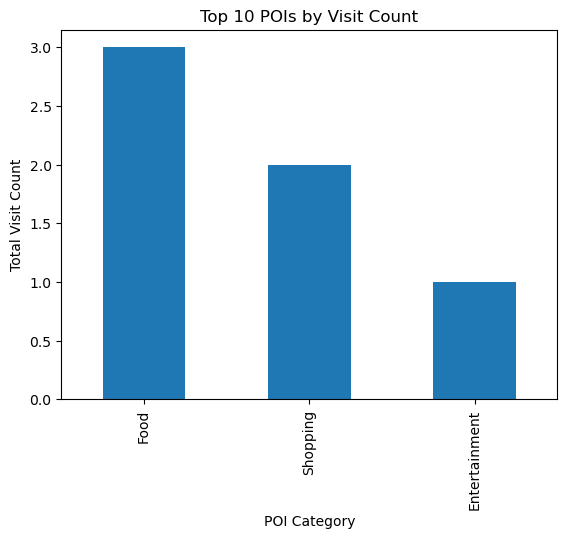

In [37]:

POIdata_cityC = pd.DataFrame({
    'x': [1, 1, 1, 1, 1],
    'y': [79, 84, 82, 54, 74],
    'category': ['Food', 'Shopping', 'Entertainment', 'Food', 'Shopping'],
    'POI_count': [2, 1, 1, 1, 1]
})

# Sum the visit count for each POI category
top_pois = POIdata_cityC.groupby('category')['POI_count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 POIs by visit count
top_pois.plot(kind='bar')
plt.title('Top 10 POIs by Visit Count')
plt.xlabel('POI Category')
plt.ylabel('Total Visit Count')
plt.show()


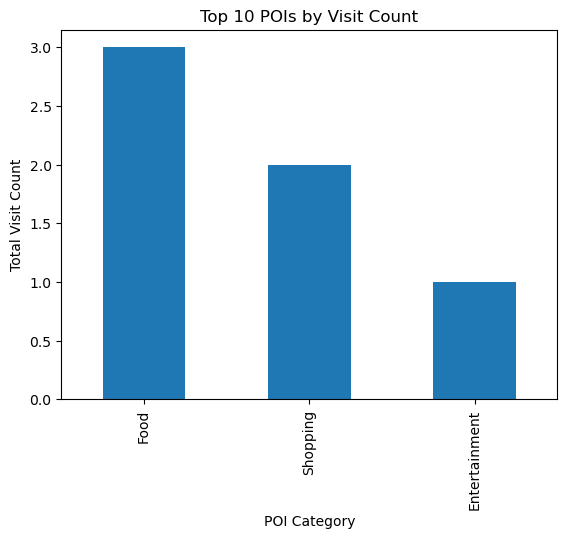

In [38]:

POIdata_cityD = pd.DataFrame({
    'x': [1, 1, 1, 1, 1],
    'y': [79, 84, 82, 54, 74],
    'category': ['Food', 'Shopping', 'Entertainment', 'Food', 'Shopping'],
    'POI_count': [2, 1, 1, 1, 1]
})

# Sum the visit count for each POI category
top_pois = POIdata_cityD.groupby('category')['POI_count'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 POIs by visit count
top_pois.plot(kind='bar')
plt.title('Top 10 POIs by Visit Count')
plt.xlabel('POI Category')
plt.ylabel('Total Visit Count')
plt.show()


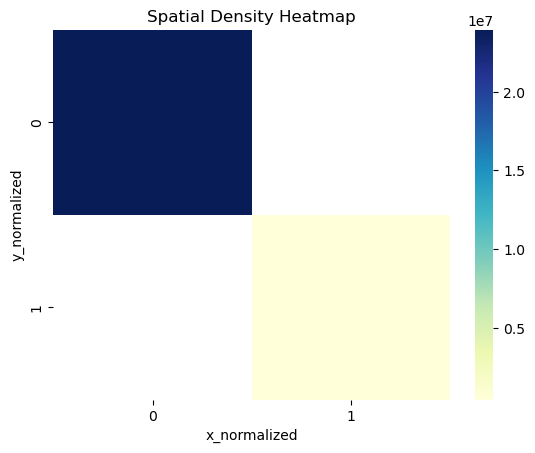

Category Distribution in CityA:
Food             2
Shopping         2
Entertainment    1
Name: category, dtype: int64
Category Distribution in CityB:
Food             2
Shopping         2
Entertainment    1
Name: category, dtype: int64
Category Distribution in CityC:
Food             2
Shopping         2
Entertainment    1
Name: category, dtype: int64
Category Distribution in CityD:
Food             2
Shopping         2
Entertainment    1
Name: category, dtype: int64


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Heatmap for spatial density
heatmap_data = hiroshima_challengedata.groupby(['x_normalized', 'y_normalized']).size().reset_index(name='count')
heatmap_pivot = heatmap_data.pivot('y_normalized', 'x_normalized', 'count')
sns.heatmap(heatmap_pivot, cmap='YlGnBu')
plt.title('Spatial Density Heatmap')
plt.show()

# Analyze category distribution
for dataset, name in zip([POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD], ['CityA', 'CityB', 'CityC', 'CityD']):
    print(f"Category Distribution in {name}:")
    print(dataset['category'].value_counts())


   uid  d   t        x         y            datetime  x_normalized  \
0    0  0  20 -0.12793 -0.167486 1970-01-01 00:20:00             0   
1    0  0  21 -0.12022 -0.183045 1970-01-01 00:21:00             0   
2    0  0  25 -0.10480 -0.144148 1970-01-01 00:25:00             0   
3    0  0  26 -0.12793 -0.151927 1970-01-01 00:26:00             0   
4    0  0  27 -0.12793 -0.151927 1970-01-01 00:27:00             0   

   y_normalized  
0             0  
1             0  
2             0  
3             0  
4             0  


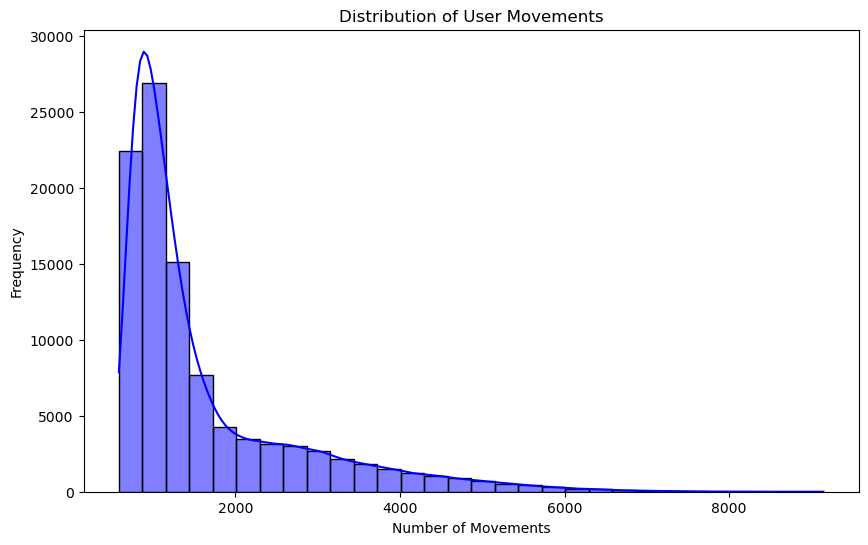

In [ ]:

# Combine datasets into one DataFrame
movement_data = pd.concat([hiroshima_challengedata,kumamoto_challengedata, sapporo_challengedata,task1_dataset_kotae ], ignore_index=True)

# Check if data is loaded correctly
print(movement_data.head())

# Visualize user movement frequency
movement_counts = movement_data.groupby('uid').size()
plt.figure(figsize=(10, 6))
sns.histplot(movement_counts, bins=30, kde=True, color='blue')
plt.title('Distribution of User Movements')
plt.xlabel('Number of Movements')
plt.ylabel('Frequency')
plt.show()

# Heatmap of visited locations
plt.figure(figsize=(10, 8))
sns.kdeplot(x=movement_data['x'], y=movement_data['y'], cmap='viridis', shade=True)
plt.title('Heatmap of User Movements')
plt.xlabel('Longitude (x)')
plt.ylabel('Latitude (y)')
plt.show()


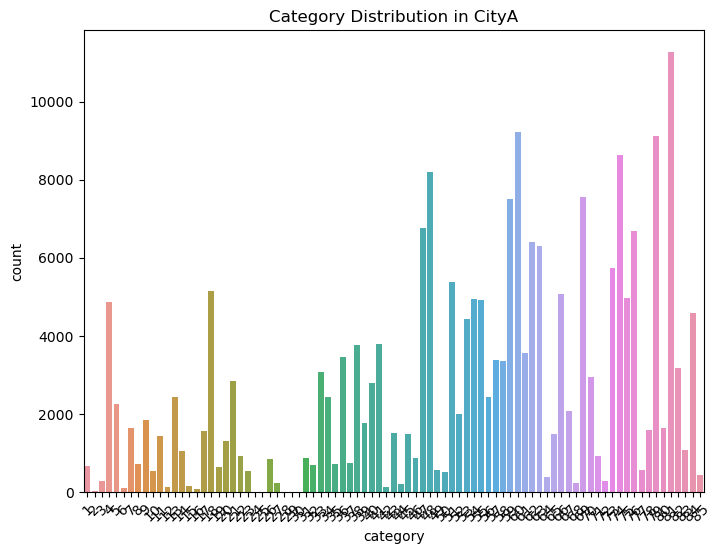

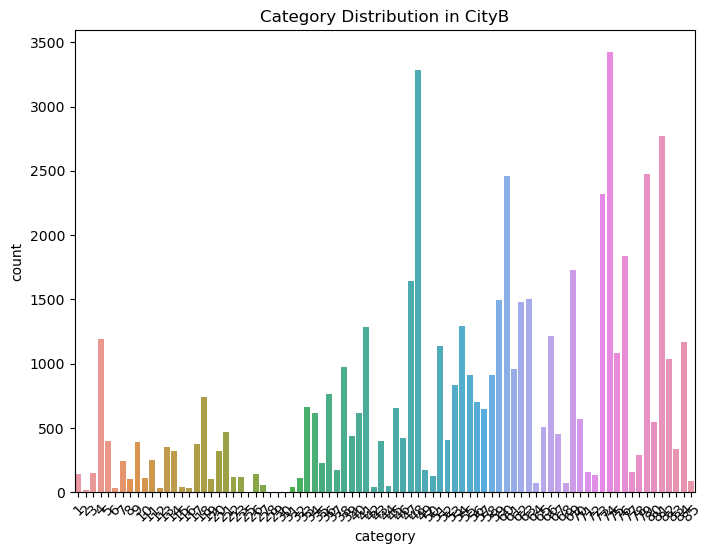

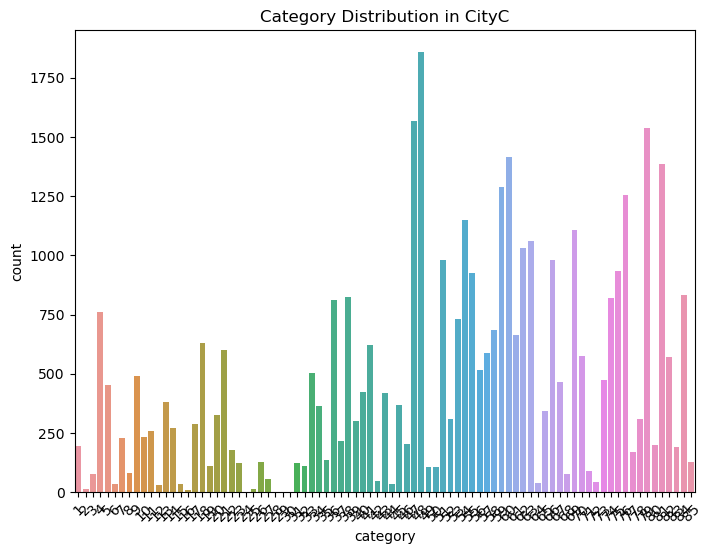

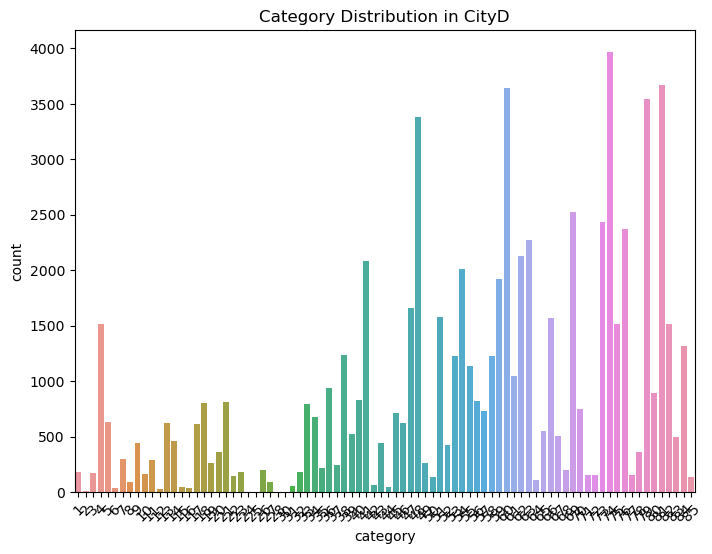

In [9]:
import seaborn as sns
for dataset, name in zip([POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD], ['CityA', 'CityB', 'CityC', 'CityD']):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x='category')
    plt.title(f"Category Distribution in {name}")
    plt.xticks(rotation=45)
    plt.show()


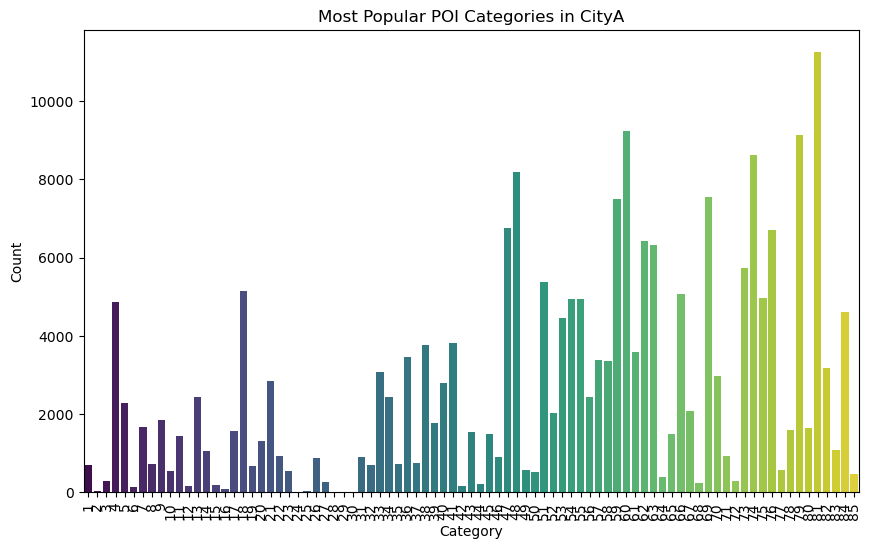

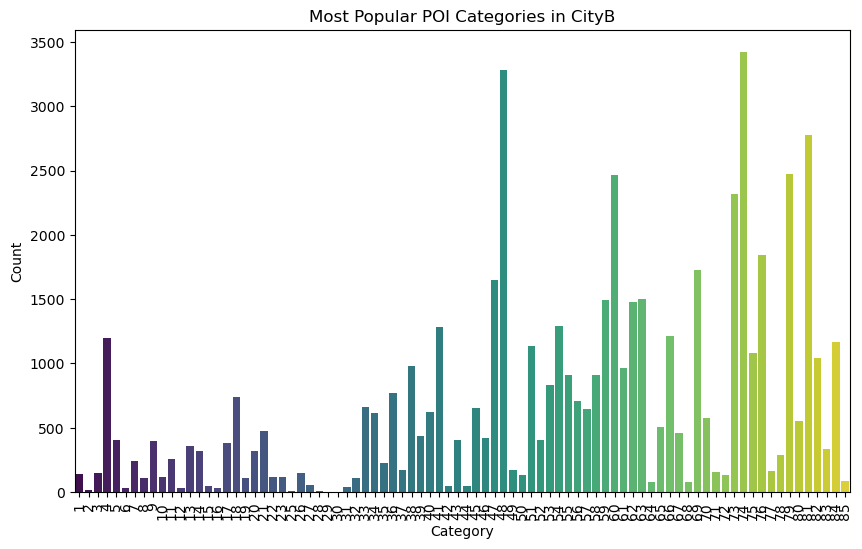

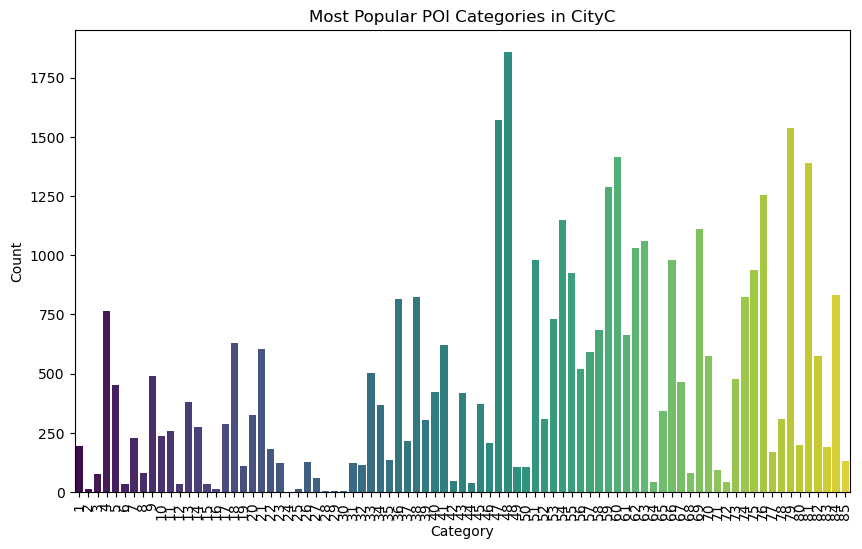

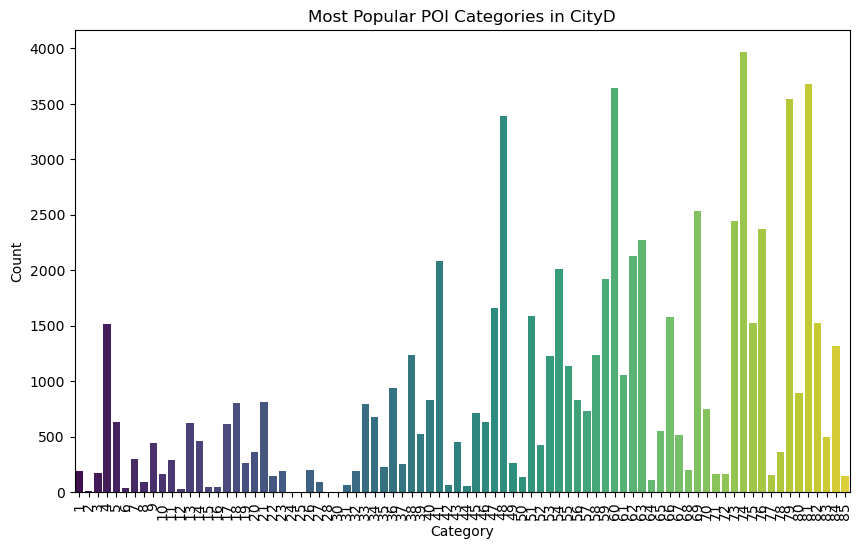

KeyError: 'POIdata_CityA'

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualizing the most popular POI categories per city (CityB, CityC, CityD)

# Analyze the category distribution for each city
for dataset, name in zip([POIdata_cityA, POIdata_cityB, POIdata_cityC, POIdata_cityD], ['CityA', 'CityB', 'CityC', 'CityD']):
    plt.figure(figsize=(10, 6))
    category_counts = dataset['category'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f"Most Popular POI Categories in {name}")
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

# 2. Spatial Distribution Heatmap for the Most Popular Activity

# Define a function to plot heatmap for spatial density of popular activities
def plot_heatmap_for_city(dataset, city_name, category):
    # Filter the dataset for the specific category
    category_data = dataset[dataset['category'] == category]
    
    # Create a pivot table to aggregate the counts based on normalized x, y coordinates
    heatmap_data = category_data.groupby(['x_normalized', 'y_normalized']).size().reset_index(name='count')
    heatmap_pivot = heatmap_data.pivot('y_normalized', 'x_normalized', 'count')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
    plt.title(f"Spatial Density Heatmap for {category} in {city_name}")
    plt.show()

# Plot the heatmap for a specific popular category in each city
#  choosing the top category from each city manually, like 'Restaurant' or 'Shopping'
top_categories = {'CityA':'2','CityB': '2', 'CityC': '2', 'CityD': '2'} 

for city_name in ['CityA','CityB', 'CityC', 'CityD']:
    plot_heatmap_for_city(globals()[f'POIdata_{city_name}'], city_name, top_categories[city_name])


In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# List of all datasets
datasets = [hiroshima_challengedata, kumamoto_challengedata, sapporo_challengedata, task1_dataset_kotae]

# Apply StandardScaler to normalize numerical features (e.g., 'x', 'y' columns)
for dataset in datasets:
    dataset[['x', 'y']] = scaler.fit_transform(dataset[['x', 'y']])

# Check the scaled values
print(hiroshima_challengedata[['x', 'y']].head())

# Encode categorical features for the POI data
from sklearn.preprocessing import LabelEncoder

# LabelEncoder to encode categorical data
label_encoder = LabelEncoder()

# List of POI datasets (assuming POIdata_cityB, POIdata_cityC, POIdata_cityD)
poi_datasets = [POIdata_cityB, POIdata_cityC, POIdata_cityD]

for dataset in poi_datasets:
    dataset['category_encoded'] = label_encoder.fit_transform(dataset['category'])

# Display the encoded categories
print(POIdata_cityB[['category', 'category_encoded']].head())

# Feature engineering example: Combine 'x' and 'y' coordinates into a new feature (distance)
for dataset in datasets:
    dataset['distance'] = (dataset['x']**2 + dataset['y']**2)**0.5

# Check the new feature
print(hiroshima_challengedata[['x', 'y', 'distance']].head())



# Optional: Handle other missing data techniques if needed, e.g., imputation
from sklearn.impute import SimpleImputer

# Impute missing values for POI datasets
imputer = SimpleImputer(strategy='mean')
for dataset in poi_datasets:
    dataset[['x', 'y']] = imputer.fit_transform(dataset[['x', 'y']])

# Verify imputation
print(POIdata_cityB[['x', 'y']].head())


         x         y
0 -0.12793 -0.167486
1 -0.12022 -0.183045
2 -0.10480 -0.144148
3 -0.12793 -0.151927
4 -0.12793 -0.151927
   category  category_encoded
0        79                77
1        84                82
2        82                80
3        54                52
4        74                72
         x         y  distance
0 -0.12793 -0.167486  0.210755
1 -0.12022 -0.183045  0.218993
2 -0.10480 -0.144148  0.178218
3 -0.12793 -0.151927  0.198615
4 -0.12793 -0.151927  0.198615
     x    y
0  1.0  1.0
1  1.0  1.0
2  1.0  2.0
3  1.0  3.0
4  1.0  3.0


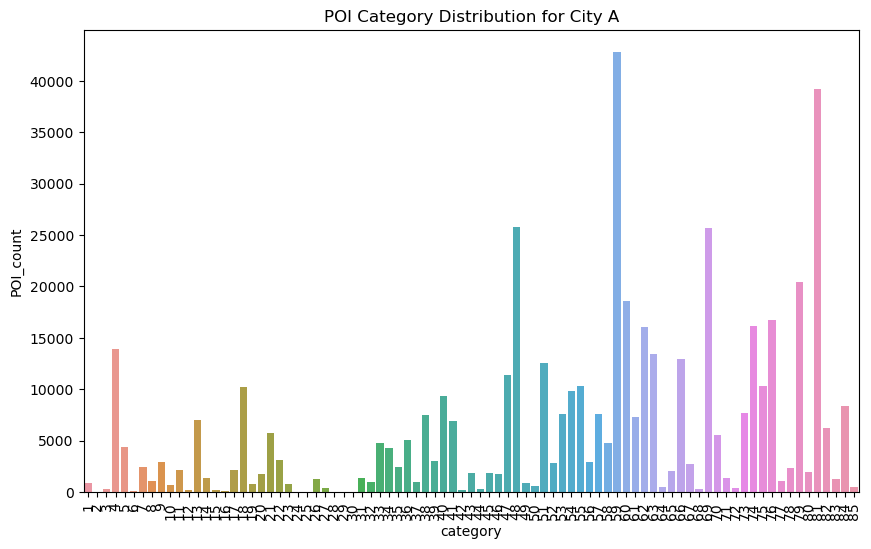

In [14]:
# Aggregating POI data by category for each city
POIdata_cityA_grouped = POIdata_cityA.groupby('category').agg({'POI_count': 'sum'}).reset_index()
POIdata_cityB_grouped = POIdata_cityB.groupby('category').agg({'POI_count': 'sum'}).reset_index()
POIdata_cityC_grouped = POIdata_cityC.groupby('category').agg({'POI_count': 'sum'}).reset_index()
POIdata_cityD_grouped = POIdata_cityD.groupby('category').agg({'POI_count': 'sum'}).reset_index()

# Plotting POI categories for each city
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='POI_count', data=POIdata_cityA_grouped)
plt.title('POI Category Distribution for City A')
plt.xticks(rotation=90)
plt.show()


# 5. Algorithm Design

In [ ]:
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
datasets = [POIdata_cityB, POIdata_cityC, POIdata_cityD,
            hiroshima_challengedata, kumamoto_challengedata,
            sapporo_challengedata, task1_dataset_kotae]

# Convert to Dask DataFrame and sort if necessary
for i, dataset in enumerate(datasets):
    if not isinstance(dataset, dd.DataFrame):
        datasets[i] = dd.from_pandas(dataset, npartitions=10)
    if not datasets[i].index.is_monotonic_increasing.compute():
        datasets[i] = datasets[i].sort_index()

# Unpack back
(POIdata_cityB, POIdata_cityC, POIdata_cityD,
 hiroshima_challengedata, kumamoto_challengedata,
 sapporo_challengedata, task1_dataset_kotae) = datasets


In [ ]:
# Combine POI data
poi_data = dd.concat([POIdata_cityB, POIdata_cityC, POIdata_cityD], ignore_index=True)

# Normalize POI coordinates
scaler = MinMaxScaler()
poi_data = poi_data.map_partitions(lambda df: df.assign(
    x_scaled=scaler.fit_transform(df[['x']]),
    y_scaled=scaler.fit_transform(df[['y']])
))
poi_data = poi_data.drop(columns=['x', 'y']).rename(columns={'x_scaled': 'x', 'y_scaled': 'y'})

# Merge challenge datasets
merged_data = dd.concat([hiroshima_challengedata, kumamoto_challengedata,
                         sapporo_challengedata, task1_dataset_kotae], ignore_index=True)



In [ ]:
import dask.dataframe as dd
import pandas as pd

# Ensure poi_data and merged_data are properly defined
# For demonstration, replace these with your actual data loading code

# Fix data type mismatches for columns 'x' and 'y'
merged_data['x'] = merged_data['x'].astype('int16')
merged_data['y'] = merged_data['y'].astype('int16')

poi_data['x'] = poi_data['x'].astype('int16')
poi_data['y'] = poi_data['y'].astype('int16')

In [ ]:
import dask.dataframe as dd
import pandas as pd

# ... (Your code to create poi_data and merged_data remains the same) ...

# Merge POI data with merged challenge data
user_poi_matrix = dd.merge(merged_data, poi_data, how='left', on=['x', 'y'])

# Convert to Pandas DataFrame BEFORE unstacking
user_poi_matrix = user_poi_matrix.compute()

# Create the user-item matrix
user_item_matrix = user_poi_matrix.groupby(['uid', 'category']).sum().unstack(fill_value=0)

print(user_item_matrix.head())


In [ ]:
print(user_poi_matrix.head())
print(user_poi_matrix.columns)

In [ ]:
print(user_item_matrix.head())

In [34]:
print(merged_data)

Dask DataFrame Structure:
                  uid     d     t      x      y
npartitions=40                                 
                int32  int8  int8  int16  int16
                  ...   ...   ...    ...    ...
...               ...   ...   ...    ...    ...
                  ...   ...   ...    ...    ...
                  ...   ...   ...    ...    ...
Dask Name: assign, 680 tasks


In [35]:
print(poi_data)

Dask DataFrame Structure:
               category POI_count      x      y
npartitions=30                                 
                   int8     int16  int16  int16
                    ...       ...    ...    ...
...                 ...       ...    ...    ...
                    ...       ...    ...    ...
                    ...       ...    ...    ...
Dask Name: assign, 510 tasks


In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example user-item matrix (replace this with your actual data)
# Ensure matrix is dense, replace NaN with 0
user_item_matrix = pd.DataFrame({
    'item1': [5, 0, 3, 1],
    'item2': [4, 0, 0, 1],
    'item3': [1, 1, 0, 5],
    'item4': [0, 0, 4, 4],
}, index=['user1', 'user2', 'user3', 'user4']).fillna(0)

# Transpose the user-item matrix for item-based filtering
item_user_matrix = user_item_matrix.T

# Calculate cosine similarity between items
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(
    item_similarity, 
    index=user_item_matrix.columns, 
    columns=user_item_matrix.columns
)

print("Item-Item Similarity Matrix:")
print(item_similarity_df)

# Function to predict ratings for an item based on similar items
def predict_item_based(user, user_item_matrix, item_similarity_df):
    """Predict ratings for all items for a given user."""
    user_ratings = user_item_matrix.loc[user]
    predictions = {}

    for item in user_item_matrix.columns:
        if user_ratings[item] == 0:  # Only predict for items not rated
            similar_items = item_similarity_df[item]
            rated_items = user_ratings[user_ratings > 0]

            # Weighted sum of ratings for similar items
            numerator = np.dot(similar_items[rated_items.index], rated_items.values)
            denominator = similar_items[rated_items.index].sum()

            predictions[item] = numerator / denominator if denominator != 0 else 0

    return predictions

# Example: Predict ratings for 'user1'
predicted_ratings = predict_item_based('user1', user_item_matrix, item_similarity_df)
print("\nPredicted Ratings for User1:")
print(predicted_ratings)

# Generate recommendations
def recommend_items_item_based(user, user_item_matrix, predicted_ratings, top_n=3):
    """Generate top N recommendations for a user."""
    already_rated = user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index
    recommendations = {item: rating for item, rating in predicted_ratings.items() if item not in already_rated}
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return sorted_recommendations[:top_n]

# Example: Get top 3 recommendations for 'user1'
top_recommendations = recommend_items_item_based('user1', user_item_matrix, predicted_ratings, top_n=3)
print("\nTop Recommendations for User1:")
print(top_recommendations)


Item-Item Similarity Matrix:
          item1     item2     item3     item4
item1  1.000000  0.860916  0.325300  0.478091
item2  0.860916  1.000000  0.420084  0.171499
item3  0.325300  0.420084  1.000000  0.680414
item4  0.478091  0.171499  0.680414  1.000000

Predicted Ratings for User1:
{'item4': 2.8247026405861093}

Top Recommendations for User1:
[('item4', 2.8247026405861093)]


In [22]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Example Test Data (Ground Truth)
# Assuming a DataFrame with columns: 'user', 'item', 'actual_rating'
test_data = pd.DataFrame({
    'user': ['user1', 'user1', 'user2', 'user2', 'user3'],
    'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
    'actual_rating': [4, 5, 3, 4, 2]
})

# Example Predicted Ratings
# This should ideally come from your recommendation model
predicted_data = pd.DataFrame({
    'user': ['user1', 'user1', 'user2', 'user2', 'user3'],
    'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
    'predicted_rating': [4.1, 4.8, 2.9, 4.2, 2.5]
})

# Merge actual and predicted ratings
evaluation_data = pd.merge(test_data, predicted_data, on=['user', 'item'])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(evaluation_data['actual_rating'], evaluation_data['predicted_rating']))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 0.2646
